In [3]:
import emoji

# M2.1 - Exploratory Data Visualization Charts and Summary Statistics
**Sergio Figueroa - Ironhack Data PT Madrid - 2020**

💎 Exploratory data analysis report about diamonds. Find and download the dataset [here](http://www.potacho.com/files/ironhack/diamonds_train.csv). 💎

## 0. The Index Enumeration

🔷 The Diamonds Basics 

🔷 The Analytic Requirements 

🔷 The Dataset Description

🔷 The Main Statistics

🔷 The Lineal Correlations

🔷 The Valuable Calculations

🔷 The BI Visualizations

## 1. The Diamonds Basics

Diamonds value are stablished by specific qualities. The gemological NPA GIA created a globally accepted standard for describing diamonds: **Color, Clarity, Cut and Carat Weight**. This analysis will cover visually those known as the **Diamonds 4Cs** and other measurements afecting the price of a diamond. Following, you'll find GIA's definitions:

🔹 Color: GIA's D-to-Z color-grading system measures the degree of colorlessness by comparing a stone under controlled lighting and precise viewing conditions to masterstones of established color value. The scale begins with the letter D, representing colorless, and continues, with increasing presence of color, to the letter Z.

🔹 Clarity: Evaluating diamond clarity involves determining the number, size, relief, nature, and position of 'inclusions' and 'blemishes.', as well as how these affect the overall appearance of the stone. The GIA Clarity Scale has 6 categories, some of which are divided for a total of 11 specific grades.

🔹 Cut: A diamond's cut grade is really about how well a diamond's facets interact with light. The GIA Cut Grading System for the standard round brilliant diamond evaluates seven components. 

🔹Carat: Diamond carat weight is the measurement of how much a diamond weighs. A metric "carat" is defined as 200 milligrams. Each carat can be subdivided into 100 'points.' This allows very precise measurements to the hundredth decimal place.

## 2. The Analytic Requirements

Documentation:

* [GIA](https://4cs.gia.edu/en-us/)
* [Lumera Diamonds](https://www.lumeradiamonds.com/diamond-education/index)
* [Brilliance](https://www.brilliance.com/education/diamonds/depth-table)
* [DnDLondon](https://www.dndlondon.com/pages/diamond-carat-weight-vs-measurements)


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
import cufflinks as cf
import plotly.express as px

In [24]:
cf.go_offline()

## 3. The Dataset Description
First, let's take a look at Diamonds dataset...

In [38]:
diamonds = pd.read_csv('../data/raw/diamonds_train.csv')
dsample = diamonds.sample(2000, random_state=500)

In [10]:
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


🔹 Diamonds dataset contains 40455 entries referring to a single diamond each one. Apparently, there is no null data in it, meaning that every entry is symmetrically comparable to any other one. Every diamong present a set of 10 cuantitative and qualitative atributes, represented by different column types:
- Categorical --> object type
- Numerical --> float64 or int64 types.

🔹Diamonds 4Cs are presented along five important measurements that help us to understand the shape of the
diamond: depth percentage, table percentage and size, being x and y face-up diameter and z the height of the piece. 


In [8]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
carat      40455 non-null float64
cut        40455 non-null object
color      40455 non-null object
clarity    40455 non-null object
depth      40455 non-null float64
table      40455 non-null float64
price      40455 non-null int64
x          40455 non-null float64
y          40455 non-null float64
z          40455 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


## 4.1 The Main Statistics - Numerical
This is the distribution of numerical variables.

In [29]:
'''Carat as ct. 1ct = 0.g gr.
As carat size increases, diamond's price increases at increasing rate Bc larger the diamond, more increasingly rare
< 1/1000000 rough stones are large enough to produce a finished 1 carat diamond. 
So, as carat weight increases, you will typically pay more not only in total, but on a price-per-carat (PPC) basis.
PPC: total price/carat weight. measure when comparing diamonds of similar but not identical carat weights.
Carat size: when carat weightx3 (1 to 3 ct), perceived size roughly x3 | diameter x1.45 (6.50 to 9.40) | crown area slightly more x2

Depth: from table to culet depth % of a diamond is calculated by dividing the depth by the width of the diamond
The lower the depth %, the larger a diamond of a given carat weight will appear

Table: Table percentage = table width / overall width.
ideal table percentage will vary based on the shape. For round-cut diamonds is between 54-60 percent, 


Price:
'''

diamonds.describe()

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


As we can see in the standard deviation parameter, there is a very big range of carat and price values. Maximum carat (weigth) is 22.5 times bigger than minimun carat, while the gap is 60 times in price. In the opposite side are %depth and %table, with every value close to the mean.

Minimun measures equal to zero reveal a few hidden null values. There are in total 16 entries where one or more of these parameteres is missing. Let's take a look at these entries.

In [21]:
diamonds[(diamonds['x'] == 0) | (diamonds['y'] == 0) | (diamonds['z']== 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
1606,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
3945,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,0.0
6465,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.0
13839,2.80,Good,G,SI2,63.8,58.0,18788,8.90,8.85,0.0
14815,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
14891,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0
16425,2.20,Premium,H,SI1,61.2,59.0,17265,8.42,8.37,0.0
19856,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
21602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
24795,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0


## 4.2 The Main Statistics - Categorical
Let's study the categorical 3Cs...

To some experts, cut is the most important C determining a diamond cost. There are five categories in the dataset and most of the values lie in the top three bins. As explained by Lumera Diamonds:

> "A too-deep cut diamond would yield a significantly larger diamond, earning the diamond cutter a larger profit on his investment. A smaller, well cut diamond may sell for less in total than the larger diamond, but it will command a higher price-per-carat not only because of its superior appearance, but also due to decreased yield from the rough stone (which therefore makes the diamond more expensive to create)"


In [35]:
#Por si Plotly Express https://community.plotly.com/t/plotly-express-histogram-any-way-to-sort-bar-by-value/23905/4

diamonds['cut'].iplot(kind='hist', title='Diamonds per Cut', color='lightblue', yTitle='Number of Diamonds', xTitle='Cut types')

Out of five color bins from GIA's standars, every diamond in the dataset is included in types Colorless (D,E,F) or Near Colorless (G,H,I,J). The distribution is mostly proportional, with a tail tending to the lowest quality.

In [36]:
diamonds['color'].iplot(kind='hist', color='lightblue', title='Diamonds per Color', yTitle='Number of Diamonds', xTitle='Color Grades')

Clarity reveals the imperfections inside (inclusions) or on the surface (blemishes) of a diamong. Quality order is as follows: FL > IF > 'VVS1', 'VVS2' > 'VS1', 'VS2' > 'SI1', 'SI2' > I1 - I3. There are not flawless diamonds here a just a few internally flawless.

In [37]:
diamonds['clarity'].iplot(kind='hist', color='lightblue', title='Diamonds per Color', yTitle='Number of Diamonds', xTitle='Clarity Grades')

## 5. The Lineal Correlations
It's time to find relationships between variables. Let's start with a correlation matrix...

In [39]:
sns.set_style("whitegrid")

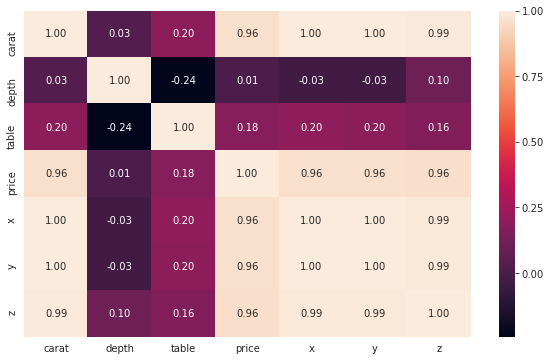

In [42]:
fig = plt.figure(figsize=(10,6))
ax = sns.heatmap(diamonds.corr(method='spearman'), annot=True, fmt=".2f")
ax



Por la tabla de correlaciones vemos que hay una correlación total entre precio, carat y dimensiones, 
por lo que fijamos valores en la variable PPC para buscar cuál es entonces lo que afecta a la variabilidad.


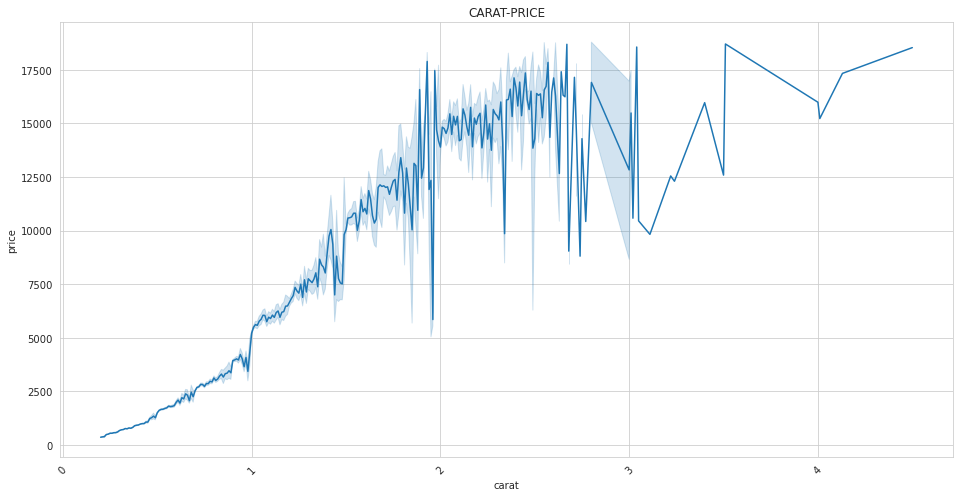

In [32]:
####CARAT-PRICE####
#1. El carat no lo es todo. Cuando llega a 2,5 aprox el peso deja de importar. 

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16, 8))

ax.set_title('CARAT-PRICE')
ax1 = sns.lineplot(data=diamonds, x='carat', y='price')
#ax2 = sns.lineplot(data=dsample, x='carat', y='price')
ax.xaxis.set_tick_params(rotation=45)
plt.show();

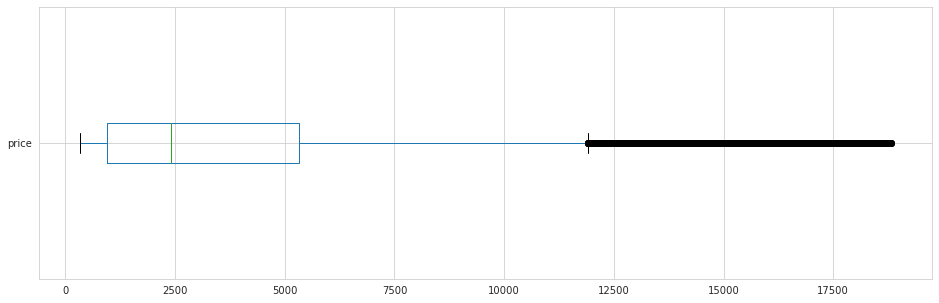

In [22]:
diamonds['price'].T.plot(kind='box', vert=False, figsize=(16,5));
#Muchísimo outliers en precio

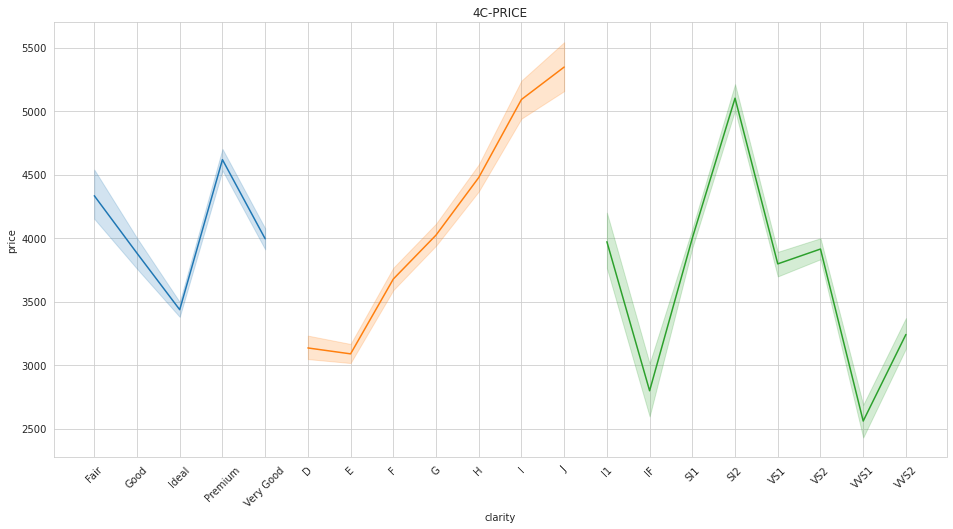

In [14]:
##Cada C tiene su propia tendencia.

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16, 8))

ax.set_title('4C-PRICE')
#ax1 = sns.lineplot(data=rihanna, x='carat', y='price')
ax2 = sns.lineplot(data=diamonds, x='cut', y='price')
ax3 = sns.lineplot(data=diamonds, x='color', y='price')
ax4 = sns.lineplot(data=diamonds, x='clarity', y='price')
ax.xaxis.set_tick_params(rotation=45)
plt.show();

In [ ]:
###CALCULATIONS

In [33]:
#PRICE PER CARAT is a standar measure in diamonds

diamonds['PPC'] = diamonds['price']/diamonds['carat']

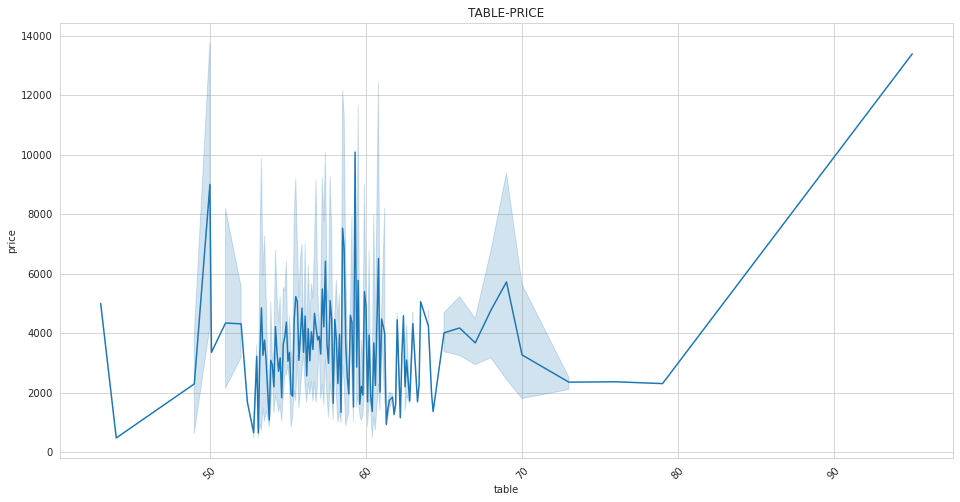

In [34]:
####TABLE-PRICE####
#1. En busca del % Table, de momento tenemos esto 

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16, 8))

ax.set_title('TABLE-PRICE')
ax1 = sns.lineplot(data=diamonds, x='table', y='price')
#ax2 = sns.lineplot(data=dsample, x='carat', y='price')
ax.xaxis.set_tick_params(rotation=45)
plt.show();